In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
df = pd.read_parquet("games_modelo.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32132 entries, 0 to 32131
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     24062 non-null  object        
 1   genres        28850 non-null  object        
 2   app_name      32131 non-null  object        
 3   title         30083 non-null  object        
 4   release_date  29781 non-null  datetime64[ns]
 5   tags          31970 non-null  object        
 6   specs         31463 non-null  object        
 7   price         32132 non-null  float64       
 8   early_access  32132 non-null  bool          
 9   id            32132 non-null  int64         
 10  developer     28834 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.5+ MB


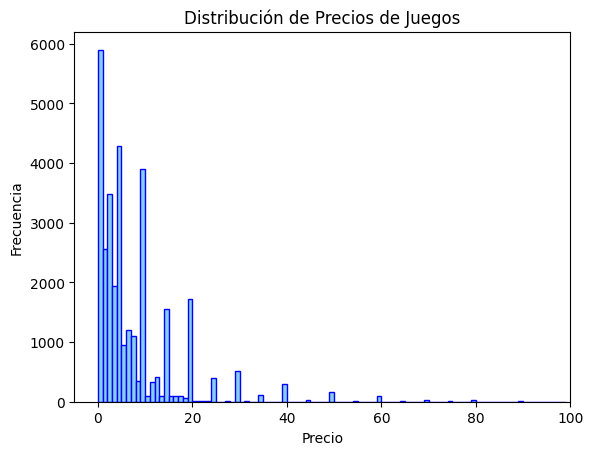

In [3]:
plt.hist(df['price'], bins=(range(0,100)), color='skyblue', edgecolor='blue')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Juegos')
plt.xlim(right=100)
plt.show()  

c:\Users\ZeeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


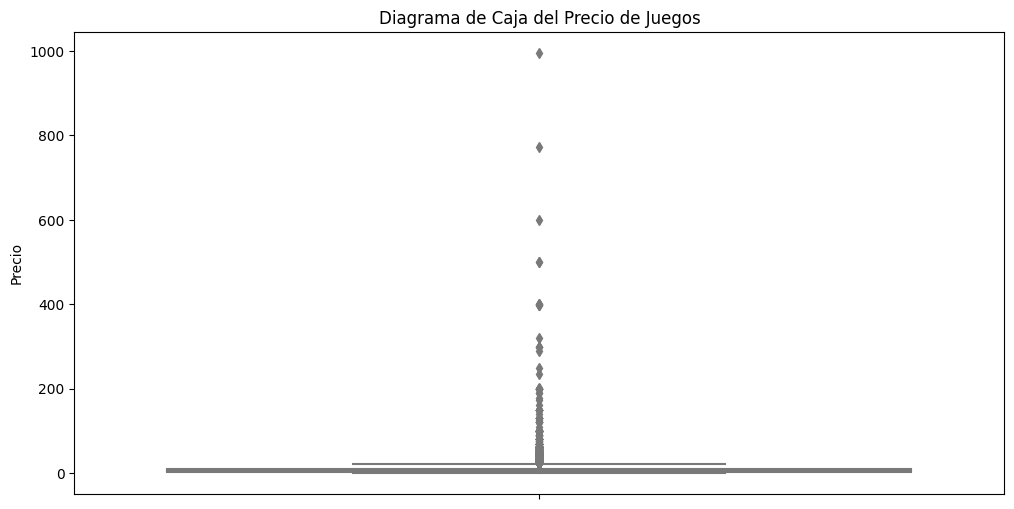

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='price', color='lightblue')
plt.ylabel('Precio')
plt.title('Diagrama de Caja del Precio de Juegos')
plt.show()

c:\Users\ZeeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


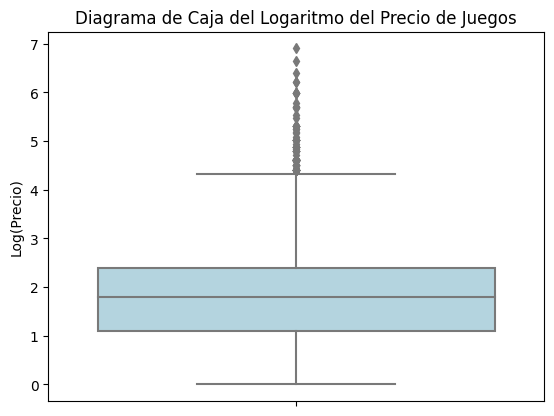

In [6]:
df['price_log'] = np.log1p(df['price'])
sns.boxplot(data=df, y='price_log', color='lightblue')
plt.ylabel('Log(Precio)')
plt.title('Diagrama de Caja del Logaritmo del Precio de Juegos')
plt.show()

In [63]:
generos = pd.read_parquet("generos.parquet")

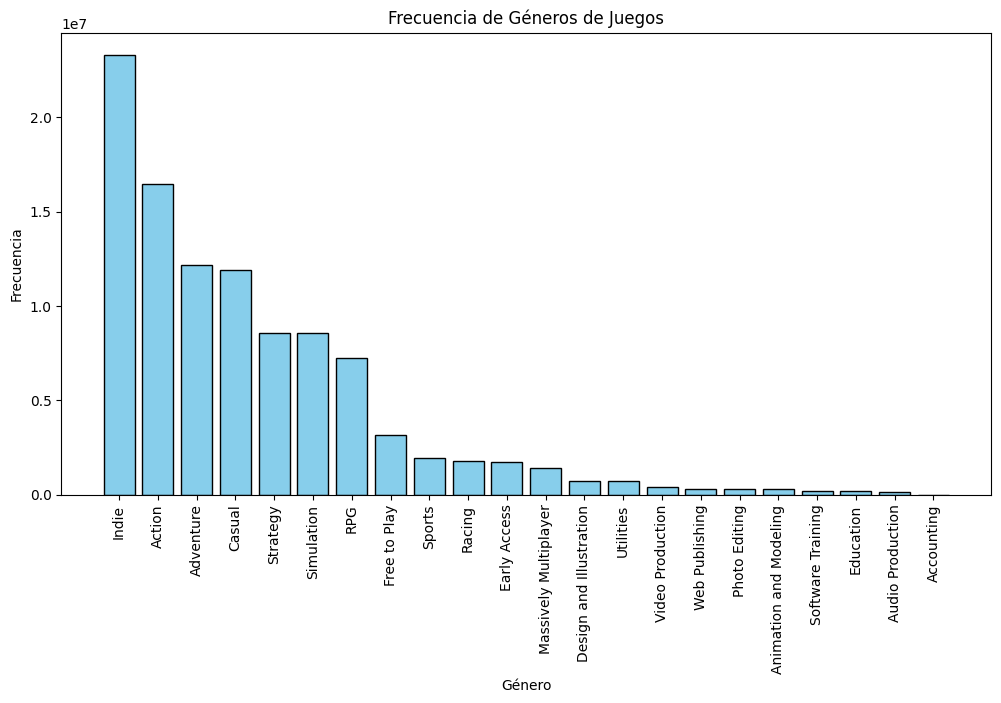

In [24]:
plt.figure(figsize=(12, 6))  
plt.bar(generos.index, generos['Cantidad'], color='skyblue', edgecolor='black')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Géneros de Juegos')
plt.xticks(rotation=90)
plt.show() 

In [80]:
df.dropna(inplace=True)

C:\Users\ZeeD\AppData\Local\Temp\ipykernel_13120\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [200]:
modelo = df[["id","title","genres"]]
modelo

,id,title,genres
0,761140,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S..."
1,643980,Ironbound,"['Free to Play', 'Indie', 'RPG', 'Strategy']"
2,670290,Real Pool 3D - Poolians,"['Casual', 'Free to Play', 'Indie', 'Simulatio..."
3,767400,弹炸人2222,"['Action', 'Adventure', 'Casual']"
5,772540,Battle Royale Trainer,"['Action', 'Adventure', 'Simulation']"
...,...,...,...
32126,745400,Kebab it Up!,"['Action', 'Adventure', 'Casual', 'Indie']"
32127,773640,Colony On Mars,"['Casual', 'Indie', 'Simulation', 'Strategy']"
32128,733530,LOGistICAL: South Africa,"['Casual', 'Indie', 'Strategy']"
32129,610660,Russian Roads,"['Indie', 'Racing', 'Simulation']"


In [91]:
gens = []
for genero in modelo["genres"]:
    for gen in eval(genero):
        if gen not in gens:
            gens.append(gen)

In [92]:
gens

['Action',
 'Casual',
 'Indie',
 'Simulation',
 'Strategy',
 'Free to Play',
 'RPG',
 'Sports',
 'Adventure',
 'Racing',
 'Massively Multiplayer',
 'Early Access',
 'Animation &amp; Modeling',
 'Video Production',
 'Web Publishing',
 'Education',
 'Software Training',
 'Utilities',
 'Design &amp; Illustration',
 'Audio Production',
 'Photo Editing']

In [201]:
modelo[modelo["title"].duplicated(keep=False)].sort_values(by="title")


,id,title,genres
30177,219441,Aliens: Colonial Marines - Reconnaissance Pack,['Action']
30176,224850,Aliens: Colonial Marines - Reconnaissance Pack,['Action']
31400,63110,Alter Ego,['Adventure']
10912,664780,Alter Ego,"['Adventure', 'Casual', 'Indie', 'RPG', 'Simul..."
22896,464510,Black Rose,['Action']
23900,453890,Black Rose,"['Adventure', 'Free to Play', 'Indie']"
4535,384010,Castles,"['Action', 'Casual', 'Indie']"
16796,666660,Castles,"['Adventure', 'Strategy']"
20303,509450,Colony,"['Casual', 'Simulation']"
12787,720060,Colony,"['Indie', 'Simulation', 'Strategy']"


In [202]:
modelo.drop_duplicates(subset='title', keep='first', inplace=True)

C:\Users\ZeeD\AppData\Local\Temp\ipykernel_13120\380953883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo.drop_duplicates(subset='title', keep='first', inplace=True)


In [203]:
generos_modelo = pd.DataFrame(columns=range(0,len(gens)))
generos_modelo


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20


In [204]:
for indice in modelo.index:
    agregar = {}
    for index, valor in enumerate(eval(modelo.loc[indice]["genres"])):
        agregar[index]=valor
    generos_modelo.loc[indice] = pd.Series(agregar)

In [205]:
generos_modelo

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Action,Casual,Indie,Simulation,Strategy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Free to Play,Indie,RPG,Strategy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Casual,Free to Play,Indie,Simulation,Sports,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Action,Adventure,Casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Action,Adventure,Simulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,Action,Adventure,Casual,Indie,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32127,Casual,Indie,Simulation,Strategy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32128,Casual,Indie,Strategy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32129,Indie,Racing,Simulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
generos_modelo.to_parquet("generos_modelo")

In [207]:
df_dummies = pd.get_dummies(generos_modelo)

In [208]:
df_dummies

,0_Action,0_Adventure,0_Animation &amp; Modeling,0_Audio Production,0_Casual,0_Design &amp; Illustration,0_Early Access,0_Education,0_Free to Play,0_Indie,...,7_Simulation,7_Sports,7_Strategy,8_Early Access,8_Simulation,8_Sports,8_Strategy,9_Sports,9_Strategy,10_Strategy
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32127,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32128,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32129,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [209]:
modelo_final = pd.concat([modelo,df_dummies], axis=1)

In [212]:
modelo_final.drop("genres",axis=1,inplace=True)

In [359]:
modelo_final = modelo_final.reset_index(drop=True)

In [387]:
modelo_final.to_parquet("modelo_final.parquet")

In [10]:
modelo_final = pd.read_parquet("modelo_final.parquet")

In [11]:
modelo_final.iloc[:,2:]

,0_Action,0_Adventure,0_Animation &amp; Modeling,0_Audio Production,0_Casual,0_Design &amp; Illustration,0_Early Access,0_Education,0_Free to Play,0_Indie,...,7_Simulation,7_Sports,7_Strategy,8_Early Access,8_Simulation,8_Sports,8_Strategy,9_Sports,9_Strategy,10_Strategy
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23263,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23264,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23265,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23266,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
similitudes = cosine_similarity(modelo_final.iloc[:,2:])

In [13]:
def recomendacion_juego(id_producto):
    # Encuentra el índice del producto en el DataFrame 'modelo_final'
    try:
        index = modelo_final[modelo_final['id'] == id_producto].index[0]
    except:
        return {"Message":"No se encuentra el ID"}

    # Obtengo el nombre para usarlo despues en la devolucion
    nombre = modelo_final[modelo_final['id'] == id_producto]["title"].values[0]

    # Obtiene las similitudes del producto con todos los demás productos
    sim_scores = list(enumerate(similitudes[index]))

    # Ordena las similitudes en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Elimina el propio producto de la lista de recomendaciones
    sim_scores = sim_scores[1:]

    # Toma las 5 primeras recomendaciones
    top_juegos = sim_scores[:5]

    # Obtiene los Title de los juegos recomendados
    recomendaciones = [modelo_final.iloc[juego[0]]['title'] for juego in top_juegos]

    recomendaciones = {nombre:list(recomendaciones)}
    
    return recomendaciones


In [14]:
azar = modelo_final["id"].sample().values[0]
print(azar)
recomendaciones = recomendacion_juego(azar)
recomendaciones

234670


{'NARUTO SHIPPUDEN: Ultimate Ninja STORM 3 Full Burst HD': ['Tomb Raider: Anniversary',
  'Sam &amp; Max 101: Culture Shock',
  'Sam &amp; Max 102: Situation: Comedy',
  'Tomb Raider: Legend',
  'Death to Spies']}

In [383]:
import joblib
joblib.dump(similitudes, 'modelo_guardado.pkl')

['modelo_guardado.pkl']

In [384]:
modelo_cargado = joblib.load('modelo_guardado.pkl')

In [385]:
similitudes = modelo_cargado
azar = modelo_final["id"].sample().values[0]
recomendaciones = recomendacion_juego(azar)
recomendaciones

{'The Ables: Freepoint High': ['Tomb Raider: Anniversary',
  'Sam &amp; Max 101: Culture Shock',
  'Sam &amp; Max 102: Situation: Comedy',
  'Tomb Raider: Legend',
  'Death to Spies']}

In [15]:
modelo_final = pd.read_parquet("modelo_final.parquet")

modelo_final = modelo_final[:500]

In [16]:
modelo_final.to_parquet("modelo_final_liviano.parquet")

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
similitudes = cosine_similarity(modelo_final.iloc[:,2:])

In [6]:
def recomendacion_juego(id_producto):
    # Encuentra el índice del producto en el DataFrame 'modelo_final'
    try:
        index = modelo_final[modelo_final['id'] == id_producto].index[0]
    except:
        return {"Message":"No se encuentra el ID"}

    # Obtengo el nombre para usarlo despues en la devolucion
    nombre = modelo_final[modelo_final['id'] == id_producto]["title"].values[0]

    # Obtiene las similitudes del producto con todos los demás productos
    sim_scores = list(enumerate(similitudes[index]))

    # Ordena las similitudes en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Elimina el propio producto de la lista de recomendaciones
    sim_scores = sim_scores[1:]

    # Toma las 5 primeras recomendaciones
    top_juegos = sim_scores[:5]

    # Obtiene los Title de los juegos recomendados
    recomendaciones = [modelo_final.iloc[juego[0]]['title'] for juego in top_juegos]

    recomendaciones = {nombre:list(recomendaciones)}
    return recomendaciones

In [9]:
azar = modelo_final["id"].sample().values[0]
recomendaciones = recomendacion_juego(azar)
recomendaciones

NameError: name 'modelo_final' is not defined